# MNIST CNN Keras

This is a simple example of a convolutional neural network (CNN) for classifying handwritten digits from the MNIST dataset using Keras.

## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2025-02-27 18:31:11.985096: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


## Load Data

Load the MNIST dataset using the Keras API.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep="\n")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize Some Data

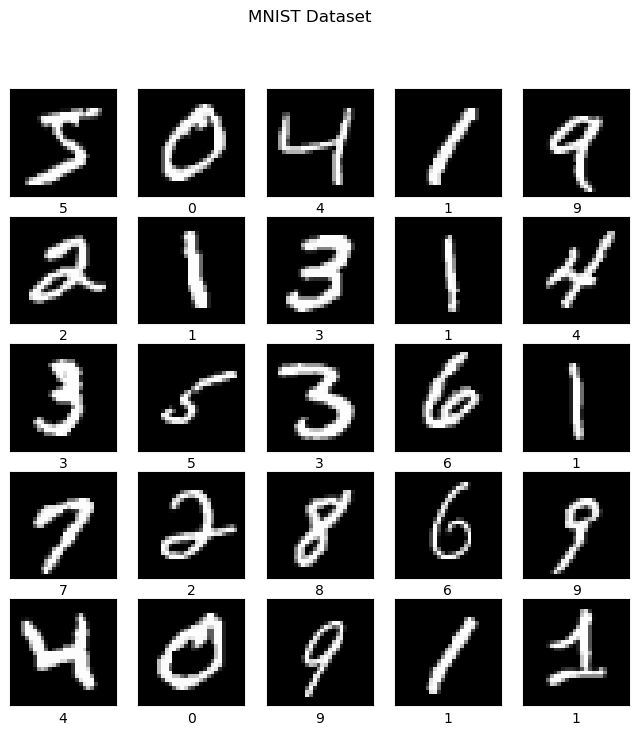

In [3]:
plt.figure(figsize=(8, 8))
plt.suptitle("MNIST Dataset")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(x_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

## Data Augmentation

Since the newer version of tensorflow decrepated the `ImageDataGenerator` class, we will use the Layers API to augment the data. To do this, build a image augmentator block.

In [ ]:
img_height, img_width = 28, 28
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

: 

In [ ]:
# have a look
for i in range(9):
    augmented_images = data_augmentation(x_train[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")